In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df=pd.read_csv(r"C:\Users\shaha\OneDrive\Documents\Eda project\Data\Cleaned_Day2")
df

,attrition_flag,customer_age,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,$60K-$80K,Blue,39,5,1,3,12691.0,1.34,1144,42,1.62,0.06
1,Existing Customer,49,F,5,Graduate,<$40K,Blue,44,6,1,2,8256.0,1.54,1291,33,3.71,0.10
2,Existing Customer,51,M,3,Graduate,$80K-$120K,Blue,36,4,1,0,3418.0,2.59,1887,20,2.33,0.00
3,Existing Customer,40,F,4,High School,<$40K,Blue,34,3,4,1,3313.0,1.40,1171,20,2.33,0.76
4,Existing Customer,40,M,3,Uneducated,$60K-$80K,Blue,21,5,1,0,4716.0,2.17,816,28,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,$40K-$60K,Blue,40,3,2,3,4003.0,0.70,15476,117,0.86,0.46
10123,Attrited Customer,41,M,2,Unknown,$40K-$60K,Blue,25,4,2,3,4277.0,0.80,8764,69,0.68,0.51
10124,Attrited Customer,44,F,1,High School,<$40K,Blue,36,5,3,4,5409.0,0.82,10291,60,0.82,0.00
10125,Attrited Customer,30,M,2,Graduate,$40K-$60K,Blue,36,4,3,3,5281.0,0.54,8395,62,0.72,0.00


## Univariate Analysis 
**Credit Limit Distribution**

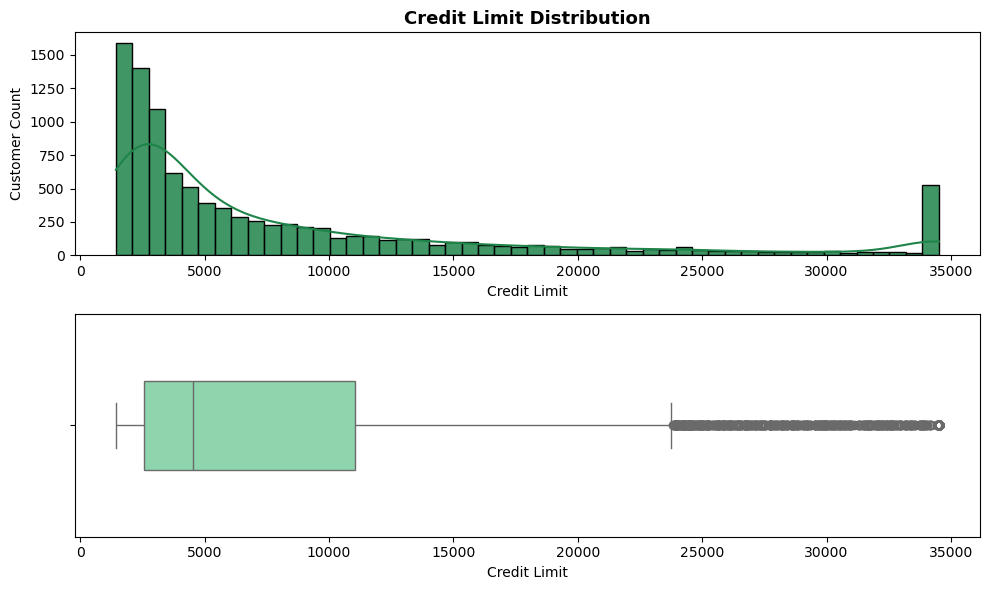

In [38]:
plt.figure(figsize=(10,6))

# Histogram + KDE (Top)
plt.subplot(2, 1, 1)
sns.histplot(
    df['credit_limit'],
    bins=50,
    kde=True,
    color="#1E8449",
    edgecolor="black",
    alpha=0.85
)
plt.title("Credit Limit Distribution", fontsize=13, weight="bold")
plt.xlabel("Credit Limit")
plt.ylabel("Customer Count")

# Boxplot (Bottom)
plt.subplot(2, 1, 2)
sns.boxplot(
    x=df['credit_limit'],
    color="#82E0AA",
    width=0.4
)
plt.xlabel("Credit Limit")

plt.tight_layout()
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\credit_limit_distribution_boxplot.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()


### Findings
- Most customers have **low to medium credit limits**.
- Only a few customers have **very high credit limits**.
- These high credit limits appear as **outliers** in the boxplot.

### Analysis
- This pattern is normal in banking, where **higher limits are given to trusted or premium customers**.
- The outliers represent **valuable customers**, not mistakes in the data.
- Credit limit by itself does not explain why customers leave, so it should be studied together with **spending behavior and credit usage**.


## Univariate Analysis 
**Target Variable (attrition_flag)**

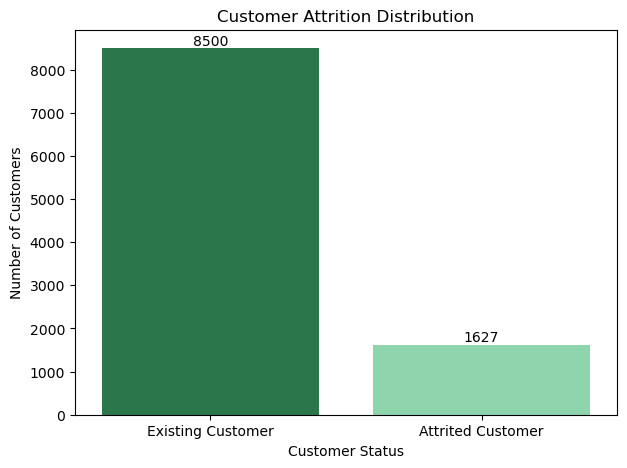

In [40]:
plt.figure(figsize=(7,5))

ax = sns.countplot(
    x='attrition_flag',
    hue='attrition_flag',        
    data=df,
    palette=["#1E8449", "#82E0AA"],
    legend=False                
)

plt.title("Customer Attrition Distribution")
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")

# Add labels
for c in ax.containers:
    ax.bar_label(c)

plt.grid(False)
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\attrition_distribution.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()


### Findings
- Most customers in the dataset are **existing customers**.
- Only a **smaller group of customers** have left the bank.
- This shows that customer churn is present but not very common.

### Analysis
- Since only a few customers have churned, churn is a **rare but important event**.
- This imbalance should be kept in mind during analysis so results are not misleading.
- Studying the churned customers carefully will help identify **why customers leave**.
- The churn variable is the key reference point for analyzing how customer behavior and profile affect churn.


## Univariate Analysis 
**Transaction Amount (total_trans_amt)**

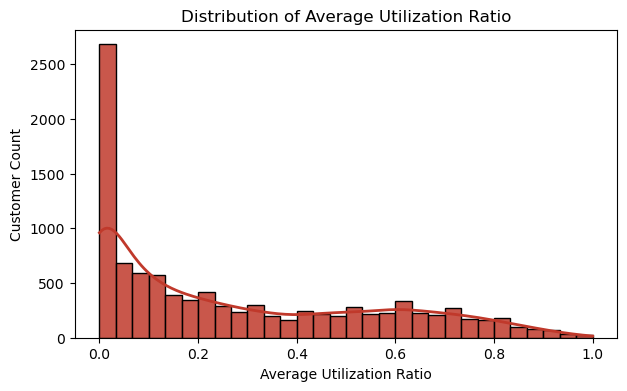

In [41]:
plt.figure(figsize=(7,4))

sns.histplot(
    df['avg_utilization_ratio'],
    kde=True,
    bins=30,
    color="#C0392B",          
    edgecolor="black",
    alpha=0.85,
    line_kws={"linewidth": 2}
)

plt.title("Distribution of Average Utilization Ratio")
plt.xlabel("Average Utilization Ratio")
plt.ylabel("Customer Count")

plt.grid(False)
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\utilization_hist.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()


### Findings
- Most customers use only a **small portion of their available credit**.
- A few customers use **almost all of their credit limit**.
- Credit usage is **not evenly spread** across customers.

### Analysis
- Customers with low credit usage may be **less engaged** with their credit card.
- Customers with very high usage may be under **financial stress**, which can increase churn risk.
- Credit utilization is an important behavior measure and becomes more meaningful when combined with **transaction activity**.



## Bivariate Analysis 
**Transaction Amount vs Churn**

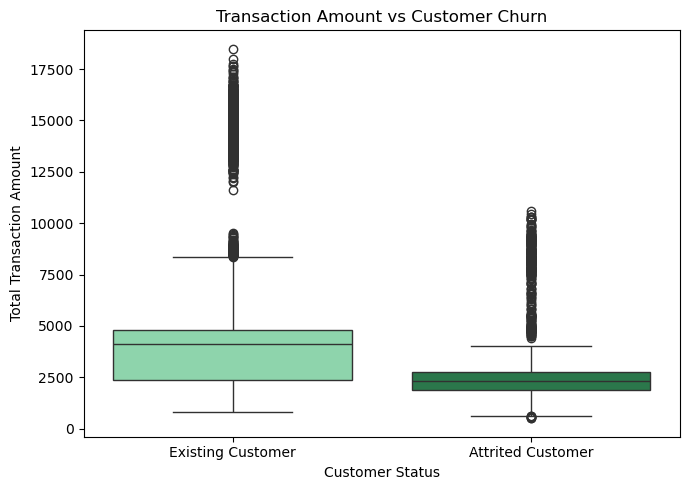

attrition_flag
Attrited Customer    3095.025814
Existing Customer    4654.655882
Name: total_trans_amt, dtype: float64

In [42]:
plt.figure(figsize=(7,5))

sns.boxplot(
    x='attrition_flag',
    y='total_trans_amt',
    hue='attrition_flag',          
    data=df,
    palette=["#82E0AA", "#1E8449"],
    legend=False                  
)

plt.title("Transaction Amount vs Customer Churn")
plt.xlabel("Customer Status")
plt.ylabel("Total Transaction Amount")

plt.grid(False)
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\transaction amount vs customer churn.png",
    dpi=300,
    bbox_inches='tight'
)
plt.tight_layout()
plt.show()
df.groupby('attrition_flag')['total_trans_amt'].mean()


### Findings
- Existing customers generally spend **more money** than customers who have churned.
- Customers who churn tend to have **lower and more consistent spending**, showing reduced activity.
- Customers with very high transaction amounts are mostly **existing customers**.

### Analysis
- Lower spending among churned customers indicates that they were **less engaged** before leaving.
- Transaction amount is a **key behavior difference** between customers who stay and those who leave.
- A drop in transaction value can be used as an **early sign of churn**, allowing the bank to take action early.


## Bivariate Analysis 
**Impact of Card Category on Customer Churn**

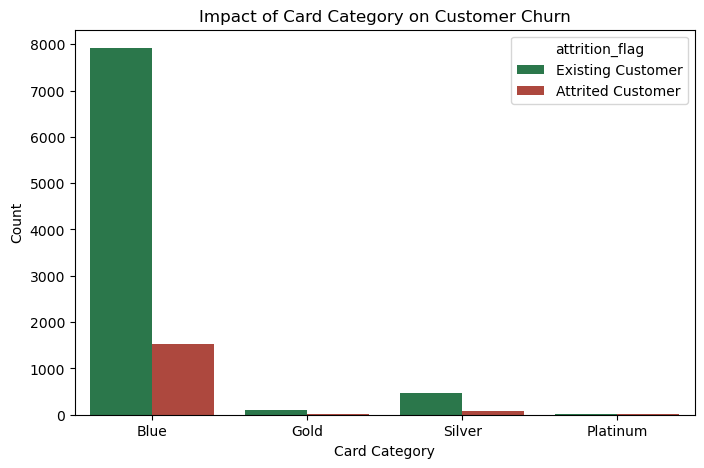

attrition_flag,Attrited Customer,Existing Customer
card_category,,
Blue,16.097923,83.902077
Gold,18.103448,81.896552
Platinum,25.000000,75.000000
Silver,14.774775,85.225225


In [62]:
import pandas as pd

# Churn percentage by card category
card_churn = pd.crosstab(
    df['card_category'],
    df['attrition_flag'],
    normalize='index'
) * 100

card_churn

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.countplot(
    x='card_category',
    hue='attrition_flag',
    data=df,
    palette={
        "Attrited Customer": "#C0392B",   # light red
        "Existing Customer": "#1E8449"    # light green
    }
)

plt.title("Impact of Card Category on Customer Churn")
plt.ylabel("Count")
plt.xlabel("Card Category")
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\cardcategory vs customerchurn.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()
card_churn

## Findings

- Most customers have a **Blue card**, which means the bank mainly serves regular customers.  
- More customers with Blue cards leave compared to customers with premium cards.  
- Customers with Gold or Platinum cards leave less often.  
- Very few premium customers churn.  

## Analysis

- Customers with basic cards (like Blue) are more likely to leave.  
- Customers with premium cards seem more loyal and stable.  
- This shows that card type may influence whether a customer stays or leaves.  
- Lower-tier customers may not feel strongly connected to the bank.  






## Bivariate Analysis 
**Tenure vs Churn**

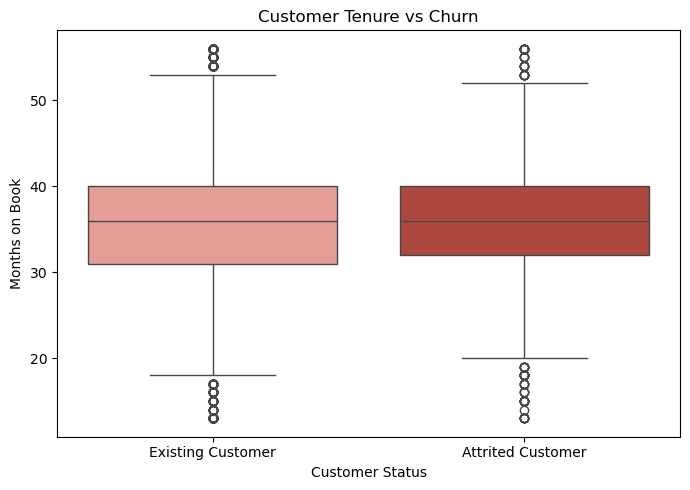

attrition_flag
Attrited Customer    36.178242
Existing Customer    35.880588
Name: months_on_book, dtype: float64

In [43]:
plt.figure(figsize=(7,5))

sns.boxplot(
    x='attrition_flag',
    y='months_on_book',
    hue='attrition_flag',          
    data=df,
    palette=["#F1948A", "#C0392B"], 
    legend=False
)

plt.title("Customer Tenure vs Churn")
plt.xlabel("Customer Status")
plt.ylabel("Months on Book")

plt.grid(False)
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\transaction tenure vs customer churn.png",
    dpi=300,
    bbox_inches='tight'
)
plt.tight_layout()
plt.show()


df.groupby('attrition_flag')['months_on_book'].mean()


### Findings
- Existing customers show a **higher average and median tenure** compared to customers who have churned.
- Customers who churn tend to have **shorter lengths of relationship** with the bank.
- A small number of long-tenure customers still churn, but they are **less common**.

### Analysis
- Shorter tenure is associated with a **higher risk of churn**, especially during the early stages of the customer relationship.
- Longer-tenured customers appear more **stable and loyal**, reducing churn likelihood.
- This suggests that **early customer engagement and onboarding** are critical to improving retention.


## Bivariate Analysis 
**Credit Limit vs Transaction Amount**
**(Numeric vs Numeric)**

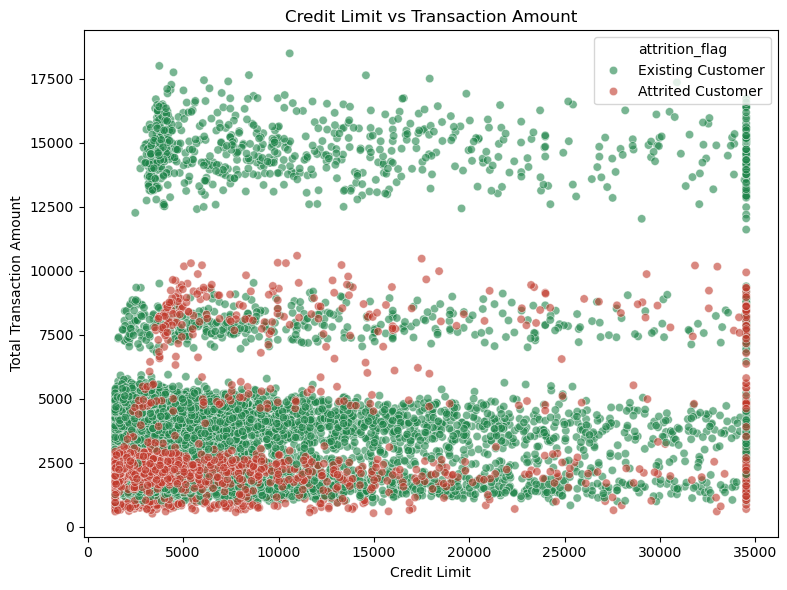

In [44]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='credit_limit',
    y='total_trans_amt',
    hue='attrition_flag',
    data=df,
    palette={
        'Existing Customer': '#1E8449',  
        'Attrited Customer': '#C0392B'    
    },
    alpha=0.6
)

plt.title("Credit Limit vs Transaction Amount")
plt.xlabel("Credit Limit")
plt.ylabel("Total Transaction Amount")

plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\credit limit vs transaction amount.png",
    dpi=300,
    bbox_inches='tight'
)
plt.grid(False)
plt.tight_layout()
plt.show()


### Findings
- Customers with higher credit limits generally show **higher transaction amounts**.
- Existing customers are more concentrated in the **higher spending and higher credit limit range**.
- Attrited customers are mostly observed at **lower credit limits and lower transaction amounts**.

### Analysis
- The positive relationship between credit limit and transaction amount indicates that **credit capacity influences spending behavior**.
- Customers with low credit limits and low spending appear to be **more vulnerable to churn**.
- Credit limit and transaction amount together provide a **strong indicator of customer value and engagement**, making them important features for churn analysis.


## Correlation Heatmap 
**Numeric Variables**

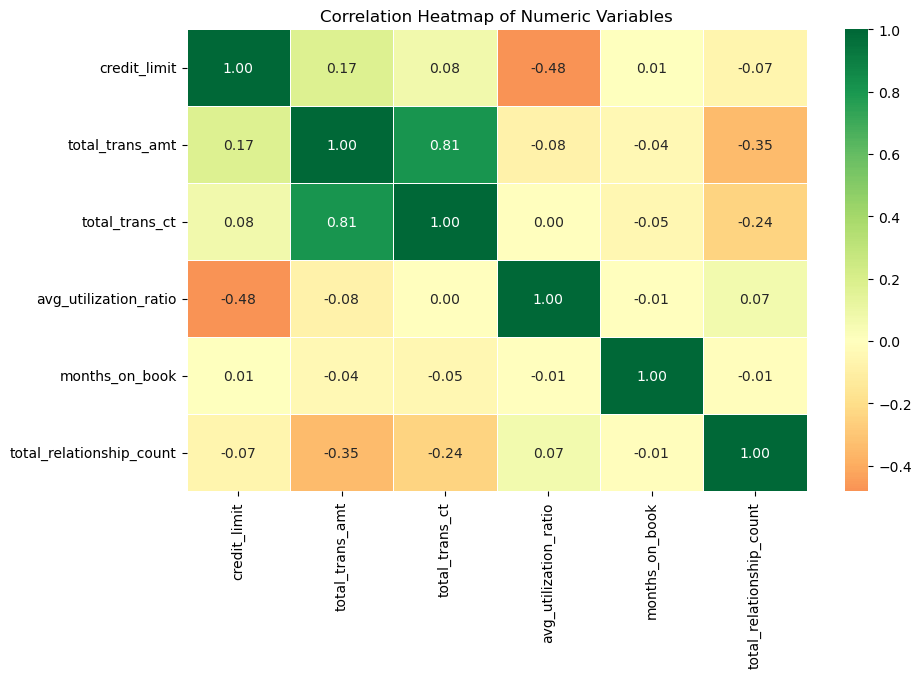

In [45]:
# Select numeric columns
num_cols = [
    'credit_limit',
    'total_trans_amt',
    'total_trans_ct',
    'avg_utilization_ratio',
    'months_on_book',
    'total_relationship_count'
]

# Correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",        
    linewidths=0.5,
    center=0              
)

plt.title("Correlation Heatmap of Numeric Variables")

plt.savefig(
   r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\correlation_heatmap.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()



### Findings
- Strong positive correlations are observed between **total transaction amount** and **total transaction count**, indicating that customers who transact more frequently also tend to spend more.
- **Credit limit** shows a moderate relationship with transaction-related variables, suggesting that higher limits support higher spending.
- **Average utilization ratio** is negatively correlated with credit limit, indicating that customers with lower credit limits tend to use a higher proportion of their available credit.

### Analysis
- Highly correlated transaction variables may capture similar customer behavior and should be considered carefully in modeling to avoid redundancy.
- The negative relationship between credit limit and utilization ratio highlights potential **financial stress** among customers with lower credit limits.
- Correlation analysis provides valuable insight into how numerical features interact and supports informed feature selection for churn modeling.


## Segment Analysis 
**Churn Rate by Income Category**

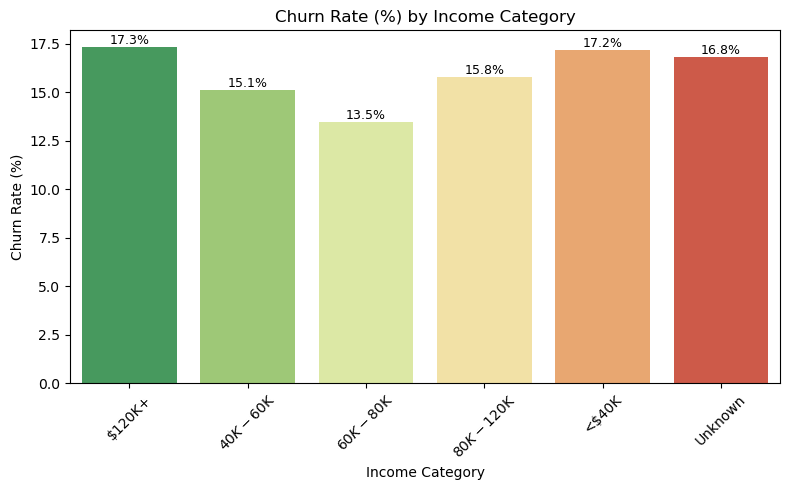

In [46]:
# Churn rate by income category
churn_rate_income = (
    pd.crosstab(df['income_category'], df['attrition_flag'], normalize='index') * 100
).reset_index()

plt.figure(figsize=(8,5))

ax = sns.barplot(
    x='income_category',
    y='Attrited Customer',
    hue='income_category',      # future-safe
    data=churn_rate_income,
    palette="RdYlGn_r",         # green (low) → red (high)
    legend=False
)

plt.title("Churn Rate (%) by Income Category")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Income Category")

plt.xticks(rotation=45)
plt.grid(False)

# Add percentage labels
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", fontsize=9)
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\churn rate by income category.png",
    dpi=300,
    bbox_inches='tight'
)
plt.tight_layout()
plt.show()


### Findings
- Churn rates vary noticeably across different income categories.
- Some income groups show **higher churn percentages** than others.
- The color scale highlights **high-risk income segments** clearly.

### Analysis
- Income level influences customer retention behavior.
- Customers in income categories with higher churn may require **targeted retention strategies**.
- Income category is a valuable demographic feature for identifying **churn-prone customer segments**.


## Segment Analysis 
**Attrition Rate by Age Group**

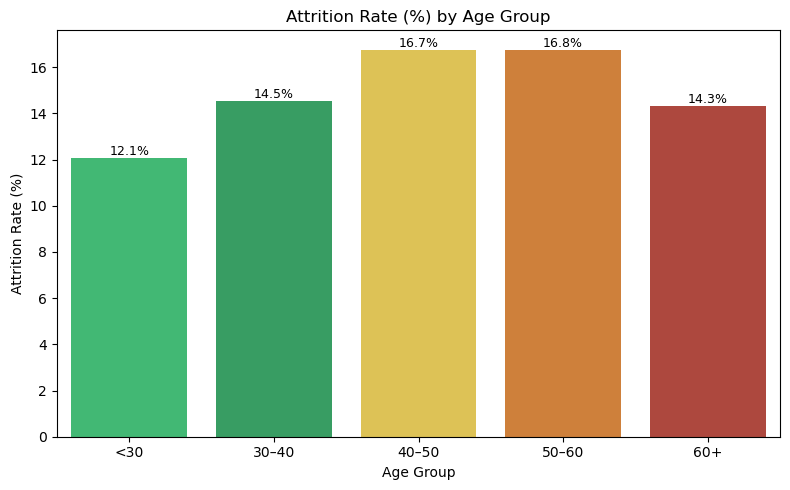

In [47]:
# Create age groups using the correct column name
df['age_group'] = pd.cut(
    df['customer_age'],
    bins=[0, 30, 40, 50, 60, 100],
    labels=['<30', '30–40', '40–50', '50–60', '60+']
)

# Calculate attrition rate (%)
age_attrition = (
    pd.crosstab(df['age_group'], df['attrition_flag'], normalize='index') * 100
).reset_index()

# Custom red–green shades (soft → strong)
custom_palette = [
    "#2ECC71",  # soft green
    "#27AE60",  # medium green
    "#F4D03F",  # yellow (transition)
    "#E67E22",  # orange
    "#C0392B"   # deep red
]

# Plot
plt.figure(figsize=(8,5))

ax = sns.barplot(
    x='age_group',
    y='Attrited Customer',
    hue='age_group',        # future-safe
    data=age_attrition,
    palette=custom_palette,
    legend=False
)

plt.title("Attrition Rate (%) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Attrition Rate (%)")
plt.grid(False)

# Add percentage labels
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", fontsize=9)
plt.savefig(
    r"C:\Users\shaha\OneDrive\Documents\Eda project\Reports\attrition rate by age .png",
    dpi=300,
    bbox_inches='tight'
)
plt.tight_layout()
plt.show()


### Findings
- Attrition rates vary across different age groups.
- Certain age groups show **higher churn percentages** compared to others.
- The color scale highlights **age segments with elevated churn risk**.

### Analysis
- Customer age influences retention behavior and engagement levels.
- Customers in higher-churn age groups may require **age-specific retention strategies**.
- Age group segmentation helps the business identify **life-stage-related churn patterns**.
